In [2]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [2]:
retail= pd.read_csv('/mnt/c/Users/Anirudh/Desktop/GlobalSuperstoreData.csv')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
retail.shape

(51290, 5)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
retail['Market_Segment']= retail['Market']+'_' +retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [7]:
retail.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


/home/ani75/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


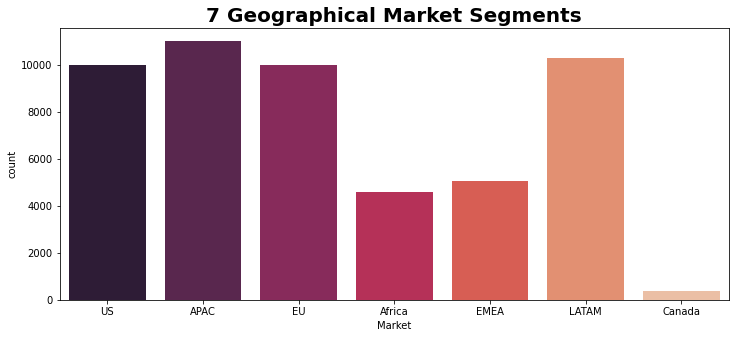

In [8]:
plt.figure(figsize=(12,5))  #max business from asia pacific
print(retail.Market.value_counts())
sns.countplot(retail['Market'], palette='rocket')
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


/home/ani75/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


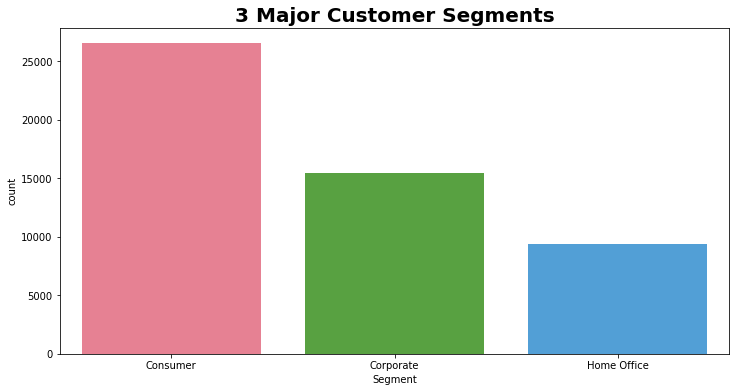

In [9]:
plt.figure(figsize=(12,6))  #consumer , corporate , home office  
print(retail.Segment.value_counts())  #most of our business coems from direct consumers
sns.countplot(retail['Segment'], palette='husl')
plt.title('3 Major Customer Segments',fontweight='bold', size=20)
plt.show() 

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


/home/ani75/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


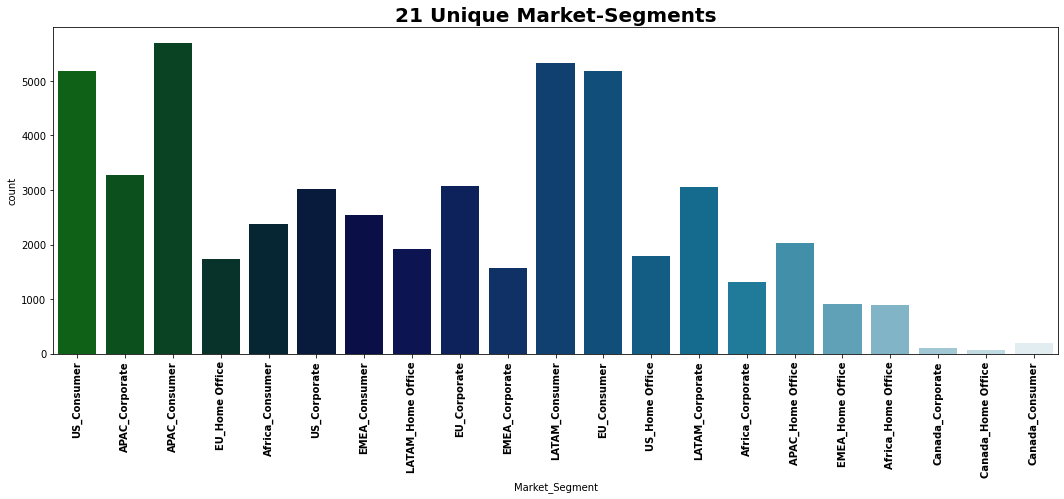

In [10]:
plt.figure(figsize=(18,6))
print(retail.Market_Segment.value_counts())
sns.countplot(retail['Market_Segment'], palette='ocean')
plt.title('21 Unique Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

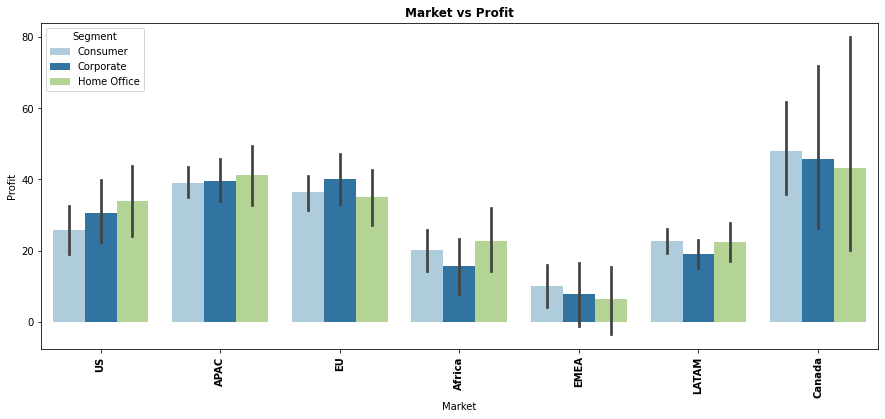

In [11]:
plt.figure(figsize=(15,6))  #canada cunsomer market gave the maximum profit
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail, palette='Paired')
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

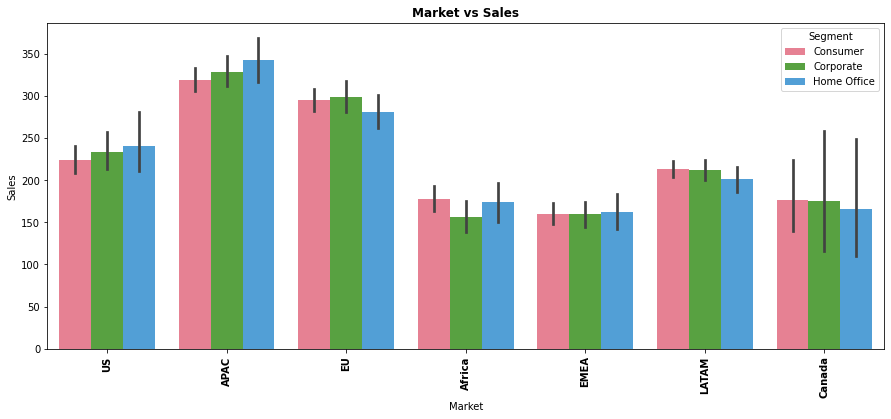

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail, palette='husl')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [13]:
retail=retail.drop(['Market','Segment'],axis=1)
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [14]:
#convert the order-date into a date-time format for getting it into the Month-year format
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail= retail.sort_values(by=['Order Date'])
retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


In [16]:
retail_profit= retail.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
retail_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [17]:
retail_profit.shape

(48, 21)

# Linear regression

In [4]:
retail1= pd.read_csv('/mnt/c/Users/Anirudh/Desktop/GlobalSuperstoreData.csv')
retail1.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [5]:
df_new=retail1.drop(columns=['Order Date','Market','Segment'])
df_new.head()

,Sales,Profit
0,2309.650,762.1845
1,3709.395,-288.7650
2,5175.171,919.9710
3,2892.510,-96.5400
4,2832.960,311.5200


In [6]:
df_new.corr()

,Sales,Profit
Sales,1.000000,0.484918
Profit,0.484918,1.000000


In [7]:
df_target=df_new['Sales'] # target
df_final=df_new.drop(['Sales'],axis=1)

In [8]:
X = np.array(df_final)
y = np.array(df_target)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3134101377207811

In [11]:
y_pred=model.predict(X_test)
y_pred.shape

(10258,)

In [12]:
y_test.shape

(10258,)

In [13]:
y_pred=y_pred

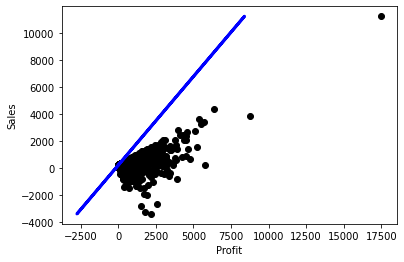

<Figure size 18000x18000 with 0 Axes>

In [14]:
plt.scatter(y_test,y_pred, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.figure(figsize=(250,250))

plt.show()

In [24]:
mse =mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

409.05808872229056

# Time Series Forecasting

In [18]:
# perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.
train_len = 42
train = retail_profit[0:train_len] # first 42 months as training set
test = retail_profit[train_len:] # last 6 months as test set

In [19]:
train.shape

(42, 21)

In [20]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [21]:
retail['Order Date'].dtype

period[M]

In [22]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date']=pd.to_datetime(retail['Order Date'])

In [23]:
retail['Order Date'].dtype

dtype('<M8[ns]')

In [24]:
#Drop the data for the rest 20 market segments and keep only the one for the market segment 
#that you found to be the most consistently profitable.
retail_df= retail[(retail.Market_Segment=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [25]:
retail_df.shape

(5699, 4)

In [26]:
data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()
#df=retail.groupby('Order Date')
#df=pd.DataFrame(df['Sales'].sum())
#df


,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [27]:
data.shape

(48, 1)

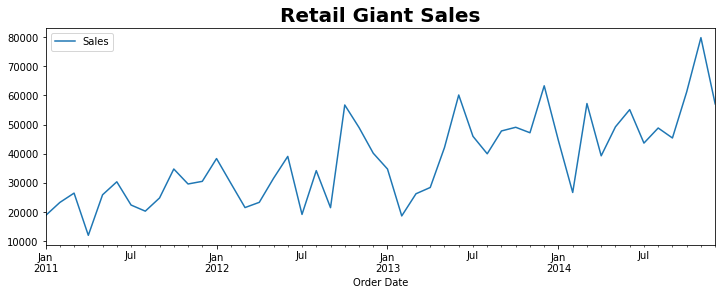

In [28]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)

In [29]:
data.isnull().sum()

Sales    0
dtype: int64

In [30]:
#Perform the train-test split for that market segment that takes the 42 months data as the train data and 
#the 6 months data as the test data.
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

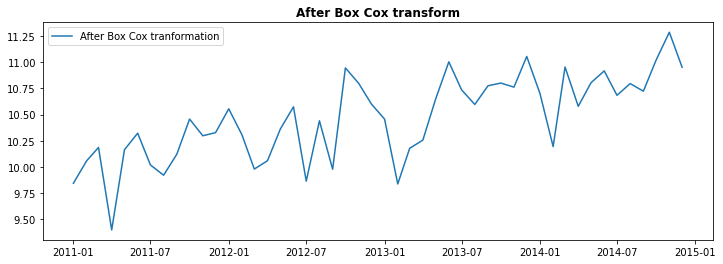

In [31]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

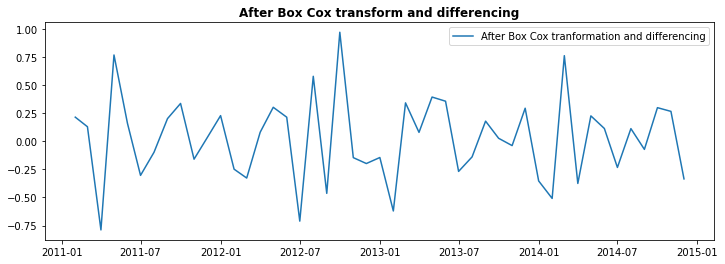

In [32]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [33]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

In [34]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# arma

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.021465
ar.L1     0.074569
ma.L1    -0.999961
sigma2    0.079221
dtype: float64


/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

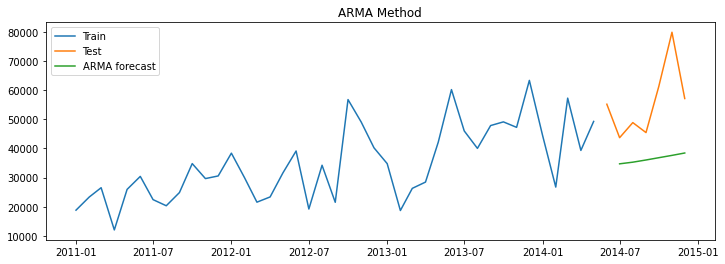

In [44]:
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
rmse

22659.91

# ARIMA

In [78]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))# p,d,q
model_fit = model.fit()
print(model_fit.params)

const     0.024251
ar.L1    -0.406725
sigma2    0.124377
dtype: float64


/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

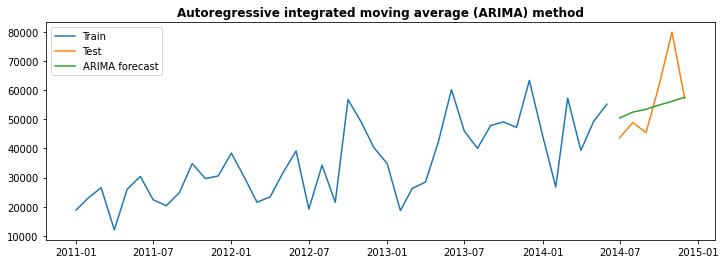

In [80]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

10988.64

# SARIMA

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ani75/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.78818D-01

At iterate    5    f=  2.69033D-01    |proj g|=  7.27534D-02

At iterate   10    f=  2.01284D-01    |proj g|=  6.98688D-02

At iterate   15    f=  1.91453D-01    |proj g|=  3.91769D-03

At iterate   20    f=  1.90537D-01    |proj g|=  1.81405D-02

At iterate   25    f=  1.90387D-01    |proj g|=  1.24828D-03

At iterate   30    f=  1.90359D-01    |proj g|=  1.03332D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [83]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

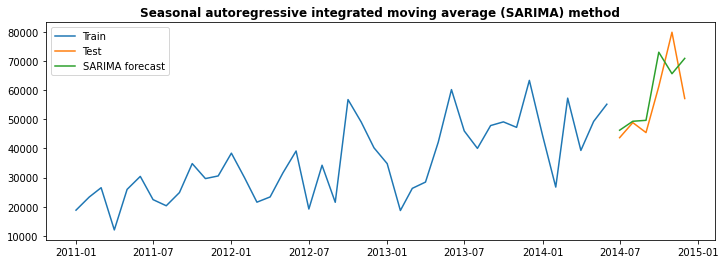

In [84]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)

rmse 

9614.6